[Motion Clouds](https://neuralensemble.github.io/MotionClouds) were defined in the origin to define parameterized moving textures. In [that other post](https://laurentperrinet.github.io/sciblog/posts/2016-07-14_static-motion-clouds.html), we defined a simple code to generate static images using a simple code. Can we generate a series of images while chanigning the phase *globally*?

![2020-01-08-MC_phase](../files/2020-01-08-MC_phase.gif)

<!-- TEASER_END -->

There are multiple solutions, and the simplest is perhaps to generate a movie that does not move. This means that the mean velocity $(V_X, V_Y)$ is null $=(0, 0)$ but also that there is no noise in the definition of the speed plane. This is defined by $B_V=0$, that is, that all the energy is concentrated on the spped plane:

In [1]:
import MotionClouds as mc
mc.N_frame, seed = 1, 42
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
name = 'phase'
env = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0)
z = mc.rectif(mc.random_cloud(env, seed=seed))
print(z.shape)
z = z.reshape((mc.N_X, mc.N_Y))

(256, 256, 1)


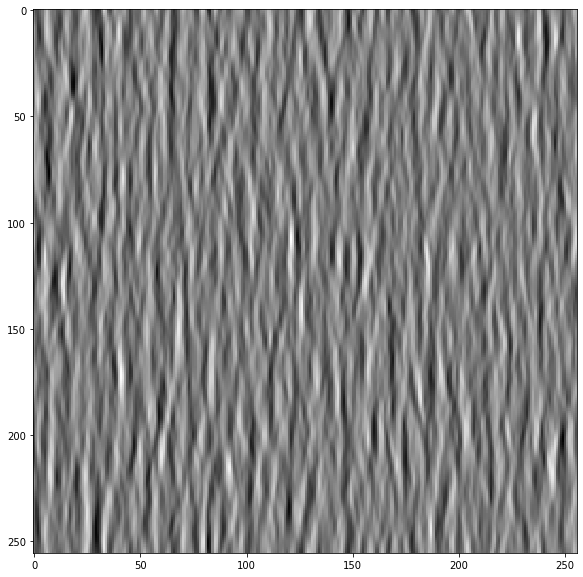

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(z.T, cmap=plt.gray())

The function generating the texture takes an envelope and multiplies it with a random phase matrix to generate the image:

In [3]:
help(mc.random_cloud)

Help on function random_cloud in module MotionClouds:

random_cloud(envelope, seed=None, impulse=False, events=None, do_amp=True)
        Returns a Motion Cloud movie as a 3D matrix from a given envelope.
    
        It first creates a random phase spectrum, multiplies with the envelope and
        then it computes the inverse FFT to obtain the spatiotemporal stimulus.
    
        Options are:
         * use a specific seed to specify the RNG's seed,
         * test the impulse response of the kernel by setting impulse to True
         * test the effect of randomizing amplitudes too by setting do_amp to True
    shape
    
        # TODO : issue a warning if more than 10% of the energy of the envelope falls off the Fourier cube
        # TODO : use a safety sphere to ensure all orientations are evenly chosen



To globally change the phase of the gabors in the texture, a "trick" is to multiply this envelope by a rotation in the complew plane (that is, by multiplying by $\exp(i\cdot\phi)$), *globally* on all points of the Fourier space, and keep the same seed:

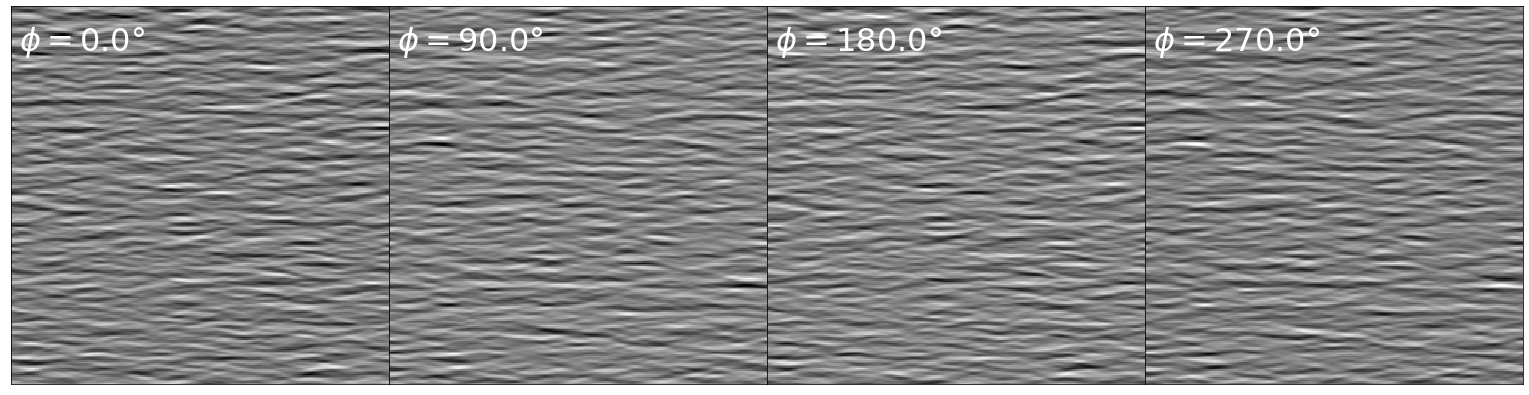

In [4]:
N_phase = 4
fig_width = 21
import numpy as np

fig, axs = plt.subplots(1, N_phase, figsize=(fig_width, fig_width/N_phase))
for i_ax, phase in enumerate(np.linspace(0, 2*np.pi, N_phase, endpoint=False)):
    im = mc.rectif(mc.random_cloud(env*np.exp(1j * phase), seed=seed))

    axs[i_ax].imshow(im[:, :, 0], cmap=plt.gray())
    axs[i_ax].text(5, 29, r'$\phi=%.1f$°' % (phase*180/np.pi), color='white', fontsize=32)
    axs[i_ax].set_xticks([])
    axs[i_ax].set_yticks([])
#plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)

#import os
#fig.savefig(os.path.join('../figs', 'orientation_tuning.png'))

now trying to generate an animation:

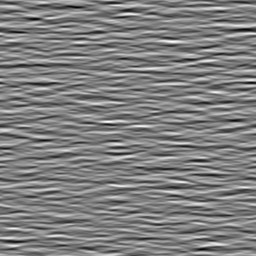

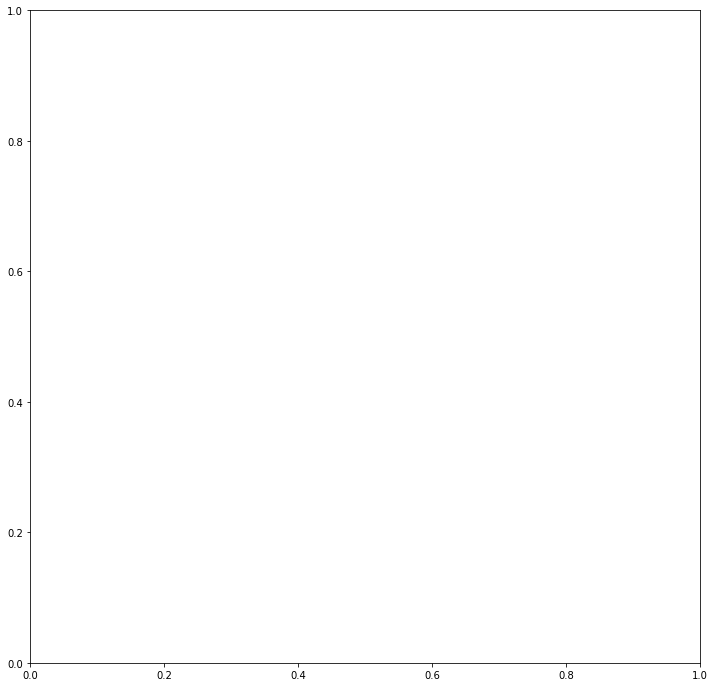

In [5]:
import imageio
from pygifsicle import optimize
N_phase = 32
fig_width = 12
fps, dpi = 8, (128, 128)

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width))
template = "/tmp/MCphase_{}.png"
for i_phase, phase in enumerate(np.linspace(0, 2*np.pi, N_phase, endpoint=False)):
    im = (mc.rectif(mc.random_cloud(env*np.exp(1j * phase), seed=seed))*255).astype(np.uint8)
    imageio.imsave(f"/tmp/MCphase_{i_phase}.png", im, dpi=dpi)

gifname = '../files/2020-01-08-MC_phase.gif'
with imageio.get_writer(gifname, mode='I', fps=fps) as writer:
    for i_phase in range(N_phase):
        writer.append_data(imageio.imread(f"/tmp/MCphase_{i_phase}.png"))
optimize(str(gifname))
from IPython.display import Image
Image(gifname, width=2000)

## some book keeping for the notebook

In [6]:
%load_ext watermark
%watermark

2020-01-08T22:19:16+01:00

CPython 3.7.6
IPython 7.11.1

compiler   : Clang 10.0.0 (clang-1000.11.45.5)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [7]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy, pillow, imageio

Software versions
Python 3.7.6 64bit [Clang 10.0.0 (clang-1000.11.45.5)]
IPython 7.11.1
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.18.0
scipy 1.4.1
matplotlib 3.1.2
sympy 1.5
pillow 7.0.0
imageio 2.6.1
Wed Jan 08 22:19:16 2020 CET

In [ ]:
%%bash
cd ..
nikola build ; nikola deploy
cd posts